# Lab: Premier League matches analysis 

![](images/dataset-cover.jpg)

This project deals with some Data Cleaning, Data Wrangling and finally some Data Analysis of Premier League data. The Premier League is the top tier football/soccer competition in England, and also considered to be one of the most important leagues in the world.

You'll find that the data is broken in some pieces, your job will be to fix the issues and then do some data analysis with it.

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('premier-league-data.csv')
df

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1,1,D,2006-2007
1,Arsenal,Aston Villa,1,1,D,2006-2007
2,Everton,Watford,2,1,H,?
3,Newcastle United,Wigan Athletic,2,1,H,2006-2007
4,Portsmouth,Blackburn Rovers,3,0,H,2006-2007
...,...,...,...,...,...,...
4555,Newcastle United,Chelsea,3,0,H,2017-2018
4556,Southampton,Manchester City,0,1,A,2017-2018
4557,Swansea City,Stoke City,1,2,A,2017-2018
4558,Tottenham Hotspur,Leicester City,5,4,H,2017-2018


#### Analyze shape and type of data

In [6]:
df.shape

(4560, 6)

There are a total of 4,560 matches logged

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   home_team   4560 non-null   object
 1   away_team   4560 non-null   object
 2   home_goals  4560 non-null   int64 
 3   away_goals  4560 non-null   int64 
 4   result      4560 non-null   object
 5   season      4560 non-null   object
dtypes: int64(2), object(4)
memory usage: 213.9+ KB


### Task 1: Invalid seasons

Explore the `season` column. Are there any invalid values? How many?

* 31 matches with an invalid season
* 27 matches with an invalid season
* 43 matches with an invalid season
* There are no invalid values in the `season` column

If you find any invalid values, replace them for the value `"Unknown Season"`.

##### Solution

The answer is 31 matches, that have the invalid season value ?.

Let's start by exploring the season column using the `value_counts()` method:

In [7]:
df["season"].value_counts()

2007-2008    380
2008-2009    380
2009-2010    380
2010-2011    380
2011-2012    380
2012-2013    380
2013-2014    380
2014-2015    380
2015-2016    380
2016-2017    380
2017-2018    380
2006-2007    349
?             31
Name: season, dtype: int64

You can clearly see all the seasons have the year-year pattern, but there are a total of `31` matches with the `?` value.

Finally, to replace the values we can do:

In [8]:
df.loc[df["season"] == "?", 'season'] = "Unknown season"

In [9]:
df["season"].value_counts()

2007-2008         380
2008-2009         380
2009-2010         380
2010-2011         380
2011-2012         380
2012-2013         380
2013-2014         380
2014-2015         380
2015-2016         380
2016-2017         380
2017-2018         380
2006-2007         349
Unknown season     31
Name: season, dtype: int64

---

### Task 2: Wrong goal count

If you keep exploring, you'll see that several matches have the wrong number of goals assigned. Take some time to analyze these invalid values and answer:

How many invalid goals do you see both for `home_goals` and `away_goals`:

* 34 invalid `home_goals` and 39 invalid `away_goals` values
* 27 invalid `home_goals` and 43 invalid `away_goals` values
* 41 invalid `home_goals` and 24 invalid `away_goals` values
* 12 invalid `home_goals` and 19 invalid `away_goals` values

Get extra morale points by using a visualization to check for these invalid values!

Once you've identify them, make sure you change any invalid goal values to `0`. This is going to be **IMPORTANT** for a upcoming activity.

##### Solution

We can start by using a histogram and a boxplot to plot all the possible values that either `home_goals` or `away_goals` take:

<AxesSubplot:ylabel='Frequency'>

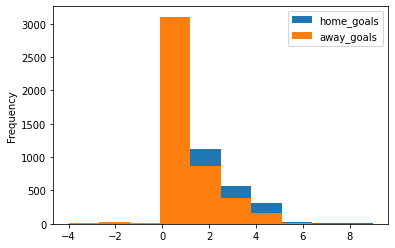

In [10]:
df[['home_goals', 'away_goals']].plot(kind='hist')

<AxesSubplot:>

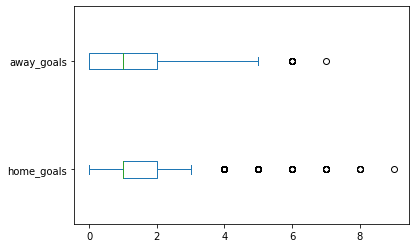

In [16]:
df[['home_goals', 'away_goals']].plot(kind='box', vert=False)

By looking at these visualizations, you can see that there are several **negative** values, which is impossible (the lowest possible number of goals in a football match is `0`).

We can now count, how many of these there are.

In [12]:
df.loc[df['home_goals'] < 0].shape

(34, 6)

In [13]:
df.loc[df['away_goals'] < 0].shape

(39, 6)

To fix the values, we just filter those invalid values and set the goal count to `0`:

In [14]:
df.loc[df['home_goals'] < 0, 'home_goals'] = 0
df.loc[df['away_goals'] < 0, 'away_goals'] = 0

We can check our histogram again and see that there are no invalid values:

<AxesSubplot:ylabel='Frequency'>

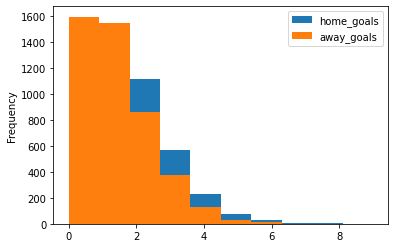

In [15]:
df[['home_goals', 'away_goals']].plot(kind='hist')

---

### Task 3: Invalid result

How many matches contain an invalid value in the `result` column?

* 43 incorrect match results
* 38 incorrect match results
* 47 incorrect match results
* 32 incorrect match results

Once you've identified them, fix them setting the correct value.

##### Solution

It's easy to spot wrong values by using the `values_count()` method:

In [17]:
df['result'].value_counts()

H    2088
A    1278
D    1151
?      43
Name: result, dtype: int64

The value `?` is clearly invalid, there are `43` matches with an invalid result.

Now, to fix them, it's a little bit more tricky. We can use multiple methods, but here's what I consider the simplest:

In [18]:
df.loc[df['home_goals'] == df['away_goals'], 'result'] = 'D'
df.loc[df['home_goals'] > df['away_goals'], 'result'] = 'H'
df.loc[df['home_goals'] < df['away_goals'], 'result'] = 'A'

In [19]:
df['result'].value_counts()

H    2107
A    1294
D    1159
Name: result, dtype: int64

---

### Task 4: Avg goals per match

What's the average amount of goals per match, rounded to 2 decimals?

**WARNING!** to solve this activity, we're considering that you've fixed the negative goal values from the previous activity. If you want to be sure, run the following lines and it shouldn't fail:

In [22]:
assert (df['home_goals'] < 0).sum() == 0
assert (df['away_goals'] < 0).sum() == 0

In [21]:
# place your answer here (1.12, 2.30, etc)

##### Solution

It's easy to calculate by first adding up all the goals ina match, and then calculating the mean:

In [23]:
(df['home_goals'] + df['away_goals']).mean()

2.6633771929824563

Another solution would be to create a new column: `total_goals`, and add both values. Then we can calculate the mean goals per match:

In [24]:
df['total_goals'] = df['home_goals'] + df['away_goals']

In [25]:
df['total_goals'].mean()

2.6633771929824563

---

### Task 5: Avg goals per season

Use any aggregation method that you feel comfortable with, and answer: what was the (valid) season with the LOWEST average goals per game.

* 2006-2007
* 2007-2008
* 2014-2015
* 2008-2009

##### Solution

If you've previously created the `total_goals` column, the solution is pretty simple using the `groupby()` method:

In [27]:
df.groupby('season')['total_goals'].mean().sort_values()

season
Unknown season    2.419355
2006-2007         2.429799
2008-2009         2.463158
2014-2015         2.500000
2007-2008         2.618421
2015-2016         2.676316
2017-2018         2.678947
2013-2014         2.718421
2009-2010         2.747368
2011-2012         2.763158
2012-2013         2.773684
2016-2017         2.794737
2010-2011         2.797368
Name: total_goals, dtype: float64

The first value, `Unknown season`, is an invalid season, so we don't consider it. We see that `2006-2007` is the next season with the lowest goal average.

If you rather feel more comfortable with Pivot Tables, here's the expression you can use:

In [28]:
pd.pivot_table(
    df, values=['total_goals'], index=['season'], aggfunc=np.mean
).sort_values('total_goals')

,total_goals
season,
Unknown season,2.419355
2006-2007,2.429799
2008-2009,2.463158
2014-2015,2.500000
2007-2008,2.618421
2015-2016,2.676316
2017-2018,2.678947
2013-2014,2.718421
2009-2010,2.747368


Finally, if you have NOT created the new column `total_goals`, it's still possible to answer the question, although it's a little bit trickier:

In [29]:
df.groupby('season').apply(
    lambda rows: (rows['home_goals'] + rows['away_goals']).mean()
).sort_values()

season
Unknown season    2.419355
2006-2007         2.429799
2008-2009         2.463158
2014-2015         2.500000
2007-2008         2.618421
2015-2016         2.676316
2017-2018         2.678947
2013-2014         2.718421
2009-2010         2.747368
2011-2012         2.763158
2012-2013         2.773684
2016-2017         2.794737
2010-2011         2.797368
dtype: float64

---

### Task 6: Biggest goal differences in a match

What's the biggest historical differences of goals scored in a match? For example, a match that was `11-1` for the home team has a difference of `10`.

* 8 goals difference
* 12 goals difference
* 6 goals difference
* 14 goals difference

##### Solution

The solution is just simply subtracting home and away goals, but using the `abs` function to remove the sign. For example, `abs(11 - 1)` is the same as `abs(1 - 11)`, which is `10`. We can do then:

In [30]:
(df['home_goals'] - df['away_goals']).abs().sort_values(ascending=False).head()

3116    8
1514    8
2458    8
1265    8
2753    7
dtype: int64

`8` goals was the maximum difference. We can see also explore those particular games.

---

### Task 7: Team with most away wins

Which is the team with most away wins?

* Chelsea
* Manchester United
* Arsenal
* Manchester City

##### Solution

The trick to answer this is to understand that in Python, booleans are integers. If you're not sure of what I'm talking about, here's a post on the subject: https://blog.rmotr.com/those-tricky-python-booleans-2100d5df92c

What we can do to get the result is then:

In [31]:
df.groupby('away_team').apply(
    lambda rows: (rows['away_goals'] > rows['home_goals']).sum()
).sort_values(ascending=False).head(10)

away_team
Chelsea              120
Manchester United    117
Arsenal              103
Manchester City       98
Liverpool             98
Tottenham Hotspur     90
Everton               66
Aston Villa           53
West Ham United       43
Newcastle United      41
dtype: int64

We could also use the `result` column that we've fixed before:

In [33]:
df.groupby('away_team').apply(
    lambda rows: (rows['result'] == 'A').sum()
).sort_values(ascending=False).head()

away_team
Chelsea              120
Manchester United    117
Arsenal              103
Manchester City       98
Liverpool             98
dtype: int64

---

### Task 8: Team with most scored goals at home

Which is the team with the most scored goals at home? The total number of goals scored at home for a given team.

* Manchester City
* Manchester United
* Chelsea
* Arsenal
* Liverpool

##### Solution

This is another simple grouping method:

In [36]:
df.groupby('home_team')['home_goals'].sum().sort_values(ascending=False).head(10)

home_team
Manchester City      499
Manchester United    495
Chelsea              488
Arsenal              471
Liverpool            459
Tottenham Hotspur    414
Everton              392
West Ham United      283
Newcastle United     267
Stoke City           244
Name: home_goals, dtype: int64